In [18]:
import prody as pr
import numpy as np
import matplotlib.pyplot as pt

In [3]:
p1 = pr.parsePDB("7dtm")

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 7dtm downloaded (C:\Users\vaniy\...\7dtm.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 7420 atoms and 1 coordinate set(s) were parsed in 0.09s.


# Задание №1

In [15]:
b = 0
res = ""
for residue in p1.iterResidues():
    mean_b = np.mean(residue.getBetas())
    if mean_b > b:
        res = residue
        b = mean_b
print(res)
print(b)

GLY 27
99.0275


In [16]:
bs = res.getBetas()
print(np.min(bs))
print(np.max(bs))

96.92
100.8


In [17]:
for residue in p1.iterResidues():
    mean_b = np.mean(residue.getBetas())
    if (mean_b < b) and (residue.getResname() != "HOH"):
        res = residue
        b = mean_b
print(res)
print(b)

SER 76
18.720000000000002


# Задание №2

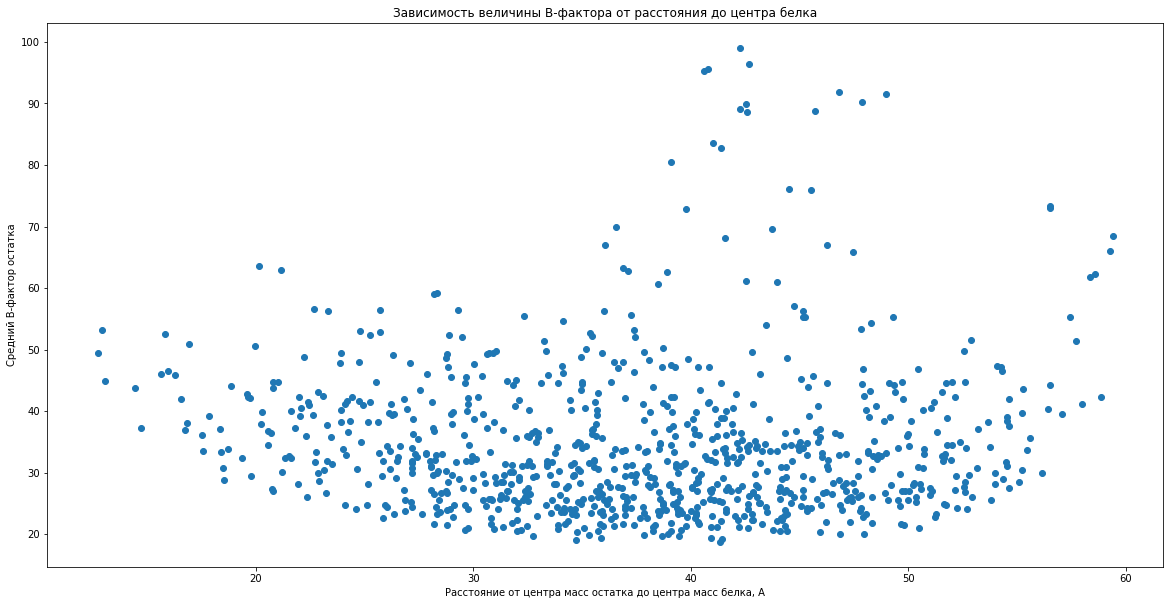

In [33]:
mean_bs = []
center = []
for residue in p1.iterResidues():
    if residue.getResname() != "HOH":
        mean_bs.append(np.mean(residue.getBetas()))
        center.append(pr.calcCenter(residue, weights = residue.getMasses()))
all_center = pr.calcCenter(p1, weights = p1.getMasses())
diff = []
for i in range(len(center)):
    diff.append(pr.calcDistance(center[i], all_center))
pt.figure(figsize = (20, 10))
pt.title("Зависимость величины В-фактора от расстояния до центра белка")
pt.scatter(diff, mean_bs)
pt.xlabel("Расстояние от центра масс остатка до центра масс белка, A")
pt.ylabel("Средний В-фактор остатка")
pt.show()